In [137]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [138]:
url=r"C:\Users\Divyansh\Downloads\archive\HR_comma_sep.csv"
dataset=pd.read_csv(url)

In [139]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [140]:
print(dataset.Department.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [141]:
print(dataset.salary.unique())

['low' 'medium' 'high']


In [142]:
dataset.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [143]:
left=dataset[dataset.left==1]
left.shape

(3571, 10)

In [144]:
retained=dataset[dataset.left==0]
retained.shape

(11428, 10)

In [145]:
dataset.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

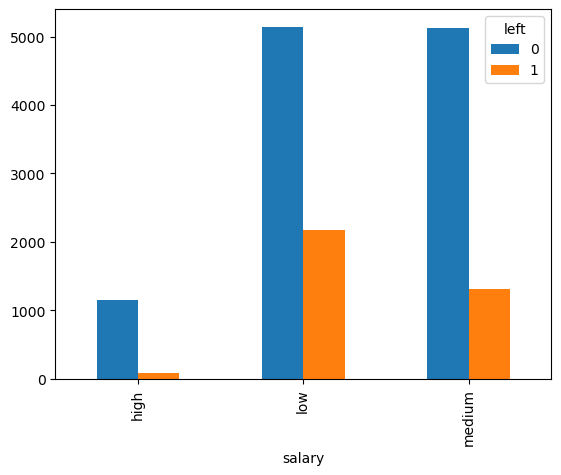

In [146]:
pd.crosstab(dataset.salary,dataset.left).plot(kind='bar')


<AxesSubplot:xlabel='Department'>

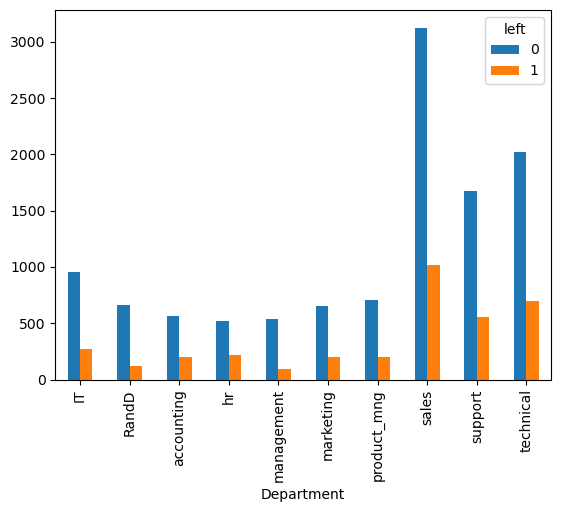

In [147]:
pd.crosstab(dataset.Department,dataset.left).plot(kind='bar')


In [148]:
subdf = dataset[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [149]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [150]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [151]:
y = dataset.left


In [152]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3,random_state=1)

In [154]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [155]:
model.fit(X_train, y_train)

LogisticRegression()

In [163]:
pred=model.predict(X_test)

In [164]:
model.score(X_test,y_test)


0.7842857142857143

In [182]:
from sklearn.metrics import r2_score
r2_score(y_test,pred,multioutput="variance_weighted")

-0.18879813995142025

In [166]:
# Model Performance
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test,model.predict(X_test)) *  100)


Accuracy :  78.42857142857143


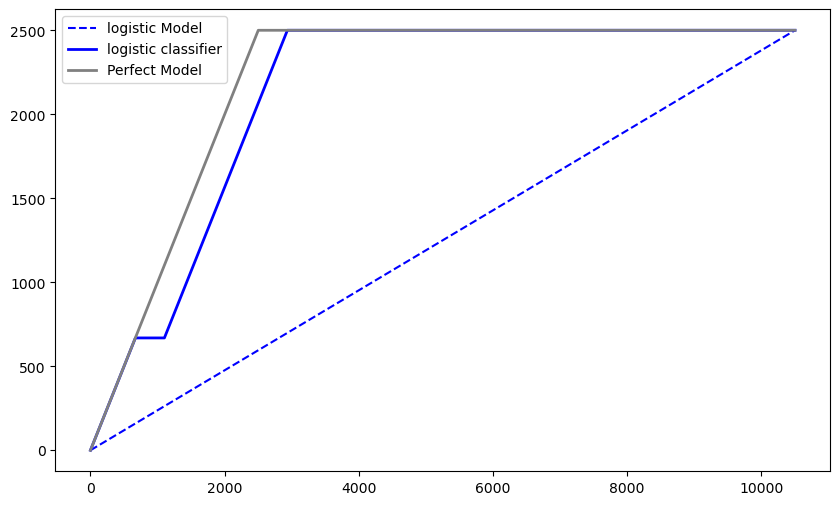

In [171]:
total = len(y_test)
 
# Counting '1' labels in test data
one_count = np.sum(y_test)
 
# counting '0' labels in test data
zero_count = total - one_count
 
plt.figure(figsize = (10, 6))
 
# x-axis ranges from 0 to total people contacted
# y-axis ranges from 0 to the total positive outcomes.
 
plt.plot([0, total], [0, one_count], c = 'b',
         linestyle = '--', label = 'logistic Model')



lm = [y for _, y in sorted(zip(pred, y_test), reverse = True)]
x = np.arange(0, total + 1)
y = np.append([0], np.cumsum(lm))
plt.plot(x, y, c = 'b', label = 'logistic classifier', linewidth = 2)


plt.plot([0, one_count, total], [0, one_count, one_count],
         c = 'grey', linewidth = 2, label = 'Perfect Model')


plt.legend()
plt.show()